# L²Space Demo: Hilbert Spaces on Intervals

This notebook demonstrates the `L2Space` class, which provides L² Hilbert spaces on interval domains. L² spaces form the foundation for more specialized function spaces like Sobolev spaces.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math
import sys

# Remove pygeoinf modules to ensure fresh import
modules_to_remove = [mod for mod in sys.modules.keys() if mod.startswith('pygeoinf')]
for mod in modules_to_remove:
    del sys.modules[mod]

# Import the L2Space and related classes
from pygeoinf.interval.interval_domain import IntervalDomain, BoundaryConditions
from pygeoinf.interval.l2_space import L2Space
from pygeoinf.interval.l2_functions import L2Function

# Set up plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("L²Space Demo - Libraries loaded successfully!")
print("We'll explore the clean, unified API for L² Hilbert spaces.")

/tmp/ipykernel_23626/3390864712.py:3: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy import integrate


L²Space Demo - Libraries loaded successfully!
We'll explore the clean, unified API for L² Hilbert spaces.


## 1. Creating L²Spaces with Different Basis Types

The new API uses `IntervalDomain` objects to specify both the geometric domain and boundary conditions.

In [2]:
print("=== Creating L²Spaces with the New Clean API ===")
print()

# 1. Fourier basis with periodic boundary conditions
fourier_domain = IntervalDomain(0, 2*np.pi, boundary_conditions=BoundaryConditions.periodic())
fourier_space = L2Space(8, function_domain=fourier_domain, basis_type='fourier')

print(f"1. Fourier L²Space:")
print(f"   Domain: {fourier_space.function_domain}")
print(f"   Dimension: {fourier_space.dim}")
print(f"   Basis type: {fourier_space.basis_type}")
print(f"   Boundary conditions: {fourier_space.boundary_conditions}")
print(f"   Interval from domain: {fourier_space.interval}")
print()

# 2. Hat functions with general Dirichlet boundary conditions
hat_domain = IntervalDomain(0, 1, boundary_conditions=BoundaryConditions.dirichlet())
hat_space = L2Space(10, function_domain=hat_domain, basis_type='hat')

print(f"2. Hat Function L²Space:")
print(f"   Domain: {hat_space.function_domain}")
print(f"   Dimension: {hat_space.dim}")
print(f"   Basis type: {hat_space.basis_type}")
print(f"   Boundary conditions: {hat_space.boundary_conditions}")
print()

# 3. Homogeneous hat functions with zero Dirichlet boundary conditions
homogeneous_domain = IntervalDomain(-1, 1, boundary_conditions=BoundaryConditions.dirichlet(0, 0))
homogeneous_space = L2Space(8, function_domain=homogeneous_domain, basis_type='hat_homogeneous')

print(f"3. Homogeneous Hat Function L²Space:")
print(f"   Domain: {homogeneous_space.function_domain}")
print(f"   Dimension: {homogeneous_space.dim}")
print(f"   Basis type: {homogeneous_space.basis_type}")
print(f"   Boundary conditions: {homogeneous_space.boundary_conditions}")
print()

print("✓ All L²Spaces created using unified IntervalDomain interface!")
print("✓ No redundant data storage - everything comes from the domain!")

=== Creating L²Spaces with the New Clean API ===

1. Fourier L²Space:
   Domain: [0.0, 6.283185307179586]
   Dimension: 8
   Basis type: fourier
   Boundary conditions: periodic
   Interval from domain: (0.0, 6.283185307179586)

2. Hat Function L²Space:
   Domain: [0.0, 1.0]
   Dimension: 10
   Basis type: hat
   Boundary conditions: dirichlet(left=0, right=0)

3. Homogeneous Hat Function L²Space:
   Domain: [-1.0, 1.0]
   Dimension: 8
   Basis type: hat_homogeneous
   Boundary conditions: dirichlet(left=0, right=0)

✓ All L²Spaces created using unified IntervalDomain interface!
✓ No redundant data storage - everything comes from the domain!


## 2. Automatic Boundary Condition Validation

The API automatically validates that basis types and boundary conditions are mathematically compatible.

In [3]:
print("=== Automatic Boundary Condition Validation ===")
print()

# Test compatible combinations
compatible_tests = [
    ("Fourier + Periodic", BoundaryConditions.periodic(), 'fourier'),
    ("Hat + General Dirichlet", BoundaryConditions.dirichlet(), 'hat'),
    ("Homogeneous Hat + Zero Dirichlet", BoundaryConditions.dirichlet(0, 0), 'hat_homogeneous'),
]

print("Compatible combinations:")
for name, bc, basis_type in compatible_tests:
    try:
        test_domain = IntervalDomain(0, 1, boundary_conditions=bc)
        test_space = L2Space(5, function_domain=test_domain, basis_type=basis_type)
        print(f"   ✓ {name}: Successfully created")
    except ValueError as e:
        print(f"   ✗ {name}: {e}")

print()
print("Incompatible combinations (should fail):")

# Test incompatible combinations
incompatible_tests = [
    ("Fourier + Zero Dirichlet", BoundaryConditions.dirichlet(0, 0), 'fourier'),
    ("Homogeneous Hat + Periodic", BoundaryConditions.periodic(), 'hat_homogeneous'),
    ("Homogeneous Hat + Non-zero Dirichlet", BoundaryConditions.dirichlet(1, 0), 'hat_homogeneous'),
]

for name, bc, basis_type in incompatible_tests:
    try:
        test_domain = IntervalDomain(0, 1, boundary_conditions=bc)
        test_space = L2Space(5, function_domain=test_domain, basis_type=basis_type)
        print(f"   ✗ {name}: Should have failed but didn't!")
    except ValueError as e:
        print(f"   ✓ {name}: Correctly rejected - {str(e)[:50]}...")

print()
print("✓ Automatic validation ensures mathematical consistency!")

=== Automatic Boundary Condition Validation ===

Compatible combinations:
   ✓ Fourier + Periodic: Successfully created
   ✓ Hat + General Dirichlet: Successfully created
   ✓ Homogeneous Hat + Zero Dirichlet: Successfully created

Incompatible combinations (should fail):
   ✓ Fourier + Zero Dirichlet: Correctly rejected - Basis type 'fourier' is not compatible with bounda...
   ✓ Homogeneous Hat + Periodic: Correctly rejected - Basis type 'hat_homogeneous' requires homogeneous ...
   ✓ Homogeneous Hat + Non-zero Dirichlet: Correctly rejected - Basis type 'hat_homogeneous' requires homogeneous ...

✓ Automatic validation ensures mathematical consistency!


## 3. Basis Function Visualization

Let's visualize the different types of basis functions and see how they respect boundary conditions.

=== Visualizing Basis Functions ===


/home/adrian/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:250: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


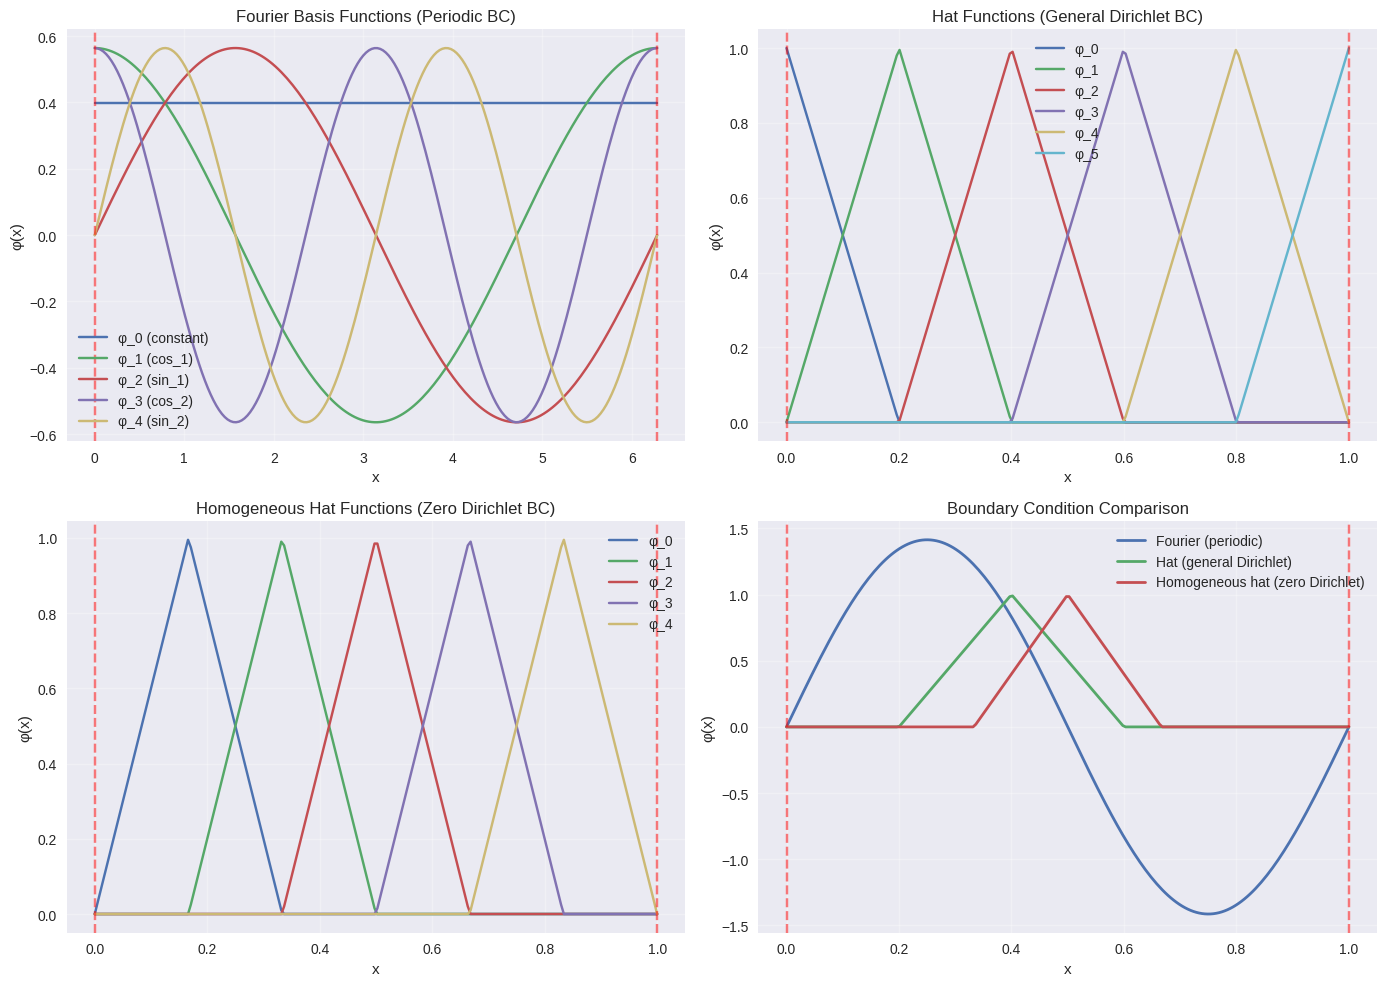

In [4]:
print("=== Visualizing Basis Functions ===")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Fourier basis functions (periodic)
ax = axes[0, 0]
fourier_domain = IntervalDomain(0, 2*np.pi, boundary_conditions=BoundaryConditions.periodic())
fourier_space = L2Space(6, function_domain=fourier_domain, basis_type='fourier')

x = np.linspace(0, 2*np.pi, 200)
for i in range(min(5, fourier_space.dim)):
    basis_func = fourier_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i} ({basis_func.name})')

ax.set_title('Fourier Basis Functions (Periodic BC)')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5, label='Domain boundaries')
ax.axvline(2*np.pi, color='red', linestyle='--', alpha=0.5)

# 2. Hat functions (general Dirichlet)
ax = axes[0, 1]
hat_domain = IntervalDomain(0, 1, boundary_conditions=BoundaryConditions.dirichlet())
hat_space = L2Space(6, function_domain=hat_domain, basis_type='hat')

x = np.linspace(0, 1, 200)
for i in range(min(6, hat_space.dim)):
    basis_func = hat_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i}')

ax.set_title('Hat Functions (General Dirichlet BC)')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

# 3. Homogeneous hat functions (zero Dirichlet)
ax = axes[1, 0]
homogeneous_domain = IntervalDomain(0, 1, boundary_conditions=BoundaryConditions.dirichlet(0, 0))
homogeneous_space = L2Space(5, function_domain=homogeneous_domain, basis_type='hat_homogeneous')

x = np.linspace(0, 1, 200)
for i in range(homogeneous_space.dim):
    basis_func = homogeneous_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i}')

ax.set_title('Homogeneous Hat Functions (Zero Dirichlet BC)')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

# 4. Comparison of boundary behavior
ax = axes[1, 1]

# Sample one function from each type
x = np.linspace(0, 1, 200)

# Fourier on [0,1] with periodic BC
fourier_test = L2Space(4, function_domain=IntervalDomain(0, 1, boundary_conditions=BoundaryConditions.periodic()), basis_type='fourier')
fourier_func = fourier_test.get_basis_function(2)  # A sine function
y_fourier = np.array([fourier_func.evaluate(xi) for xi in x])
ax.plot(x, y_fourier, label='Fourier (periodic)', linewidth=2)

# Hat function
hat_func = hat_space.get_basis_function(2)  # Interior hat function
y_hat = np.array([hat_func.evaluate(xi) for xi in x])
ax.plot(x, y_hat, label='Hat (general Dirichlet)', linewidth=2)

# Homogeneous hat function
homog_func = homogeneous_space.get_basis_function(2)
y_homog = np.array([homog_func.evaluate(xi) for xi in x])
ax.plot(x, y_homog, label='Homogeneous hat (zero Dirichlet)', linewidth=2)

ax.set_title('Boundary Condition Comparison')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 4. L² Inner Products and Gram Matrix

The L² inner product is computed via numerical integration: ⟨u,v⟩_L² = ∫_a^b u(x)v(x) dx

=== L² Inner Products and Gram Matrix ===

L²Space: 5-dimensional Fourier space on (0.0, 6.283185307179586)

Manual inner product computations:
   ⟨φ_0, φ_0⟩_L² = 1.000000
   ⟨φ_0, φ_1⟩_L² = 0.000000
   ⟨φ_0, φ_2⟩_L² = -0.000000
   ⟨φ_1, φ_1⟩_L² = 1.000000
   ⟨φ_1, φ_2⟩_L² = -0.000000
   ⟨φ_2, φ_2⟩_L² = 1.000000

Full Gram matrix (automatically computed and cached):
Gram matrix shape: (5, 5)
Gram matrix:
[[ 1.00000000e+00  0.00000000e+00 -5.55111512e-17 -1.02348685e-16
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -2.77555756e-17 -2.77555756e-17
  -5.55111512e-17]
 [-5.55111512e-17 -2.77555756e-17  1.00000000e+00  2.77555756e-17
  -2.77555756e-17]
 [-1.02348685e-16 -2.77555756e-17  2.77555756e-17  1.00000000e+00
  -2.23345648e-17]
 [ 0.00000000e+00 -5.55111512e-17 -2.77555756e-17 -2.23345648e-17
   1.00000000e+00]]

Properties of the Gram matrix:
   Symmetric: True
   Positive definite: True
   Condition number: 1.00e+00


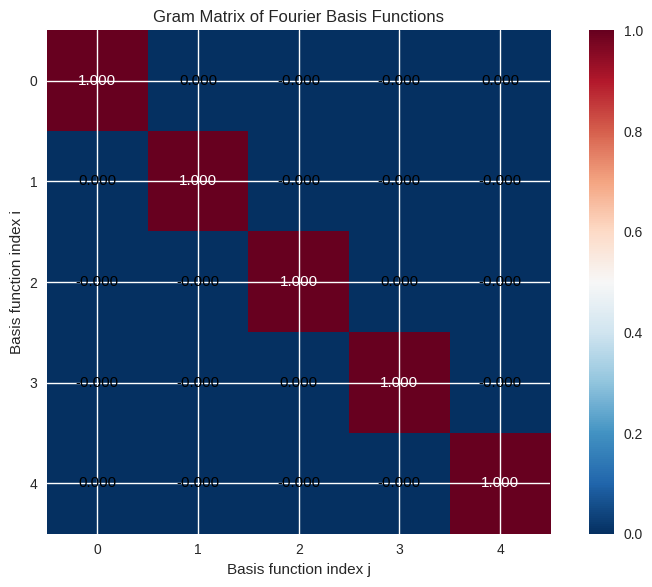

✓ Fourier basis functions are orthonormal ⟹ Gram matrix ≈ Identity


In [5]:
print("=== L² Inner Products and Gram Matrix ===")
print()

# Create a small Fourier space for demonstration
domain = IntervalDomain(0, 2*np.pi, boundary_conditions=BoundaryConditions.periodic())
space = L2Space(5, function_domain=domain, basis_type='fourier')

print(f"L²Space: {space.dim}-dimensional Fourier space on {space.interval}")
print()

# Compute some inner products manually
print("Manual inner product computations:")
for i in range(3):
    for j in range(i, 3):
        basis_i = space.get_basis_function(i)
        basis_j = space.get_basis_function(j)
        inner_prod = space.inner_product(basis_i, basis_j)
        print(f"   ⟨φ_{i}, φ_{j}⟩_L² = {inner_prod:.6f}")

print()
print("Full Gram matrix (automatically computed and cached):")
gram_matrix = space.gram_matrix
print(f"Gram matrix shape: {gram_matrix.shape}")
print("Gram matrix:")
print(gram_matrix)

print()
print("Properties of the Gram matrix:")
print(f"   Symmetric: {np.allclose(gram_matrix, gram_matrix.T)}")
print(f"   Positive definite: {np.all(np.linalg.eigvals(gram_matrix) > 0)}")
print(f"   Condition number: {np.linalg.cond(gram_matrix):.2e}")

# Visualize the Gram matrix
plt.figure(figsize=(8, 6))
im = plt.imshow(gram_matrix, cmap='RdBu_r', aspect='equal')
plt.colorbar(im)
plt.title('Gram Matrix of Fourier Basis Functions')
plt.xlabel('Basis function index j')
plt.ylabel('Basis function index i')

# Add text annotations
for i in range(gram_matrix.shape[0]):
    for j in range(gram_matrix.shape[1]):
        plt.text(j, i, f'{gram_matrix[i,j]:.3f}', ha='center', va='center',
                color='white' if abs(gram_matrix[i,j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()

print("✓ Fourier basis functions are orthonormal ⟹ Gram matrix ≈ Identity")

## 5. Function Projection and Approximation

One of the key features of L²spaces is the ability to project arbitrary functions onto finite-dimensional subspaces.

=== Function Projection and Approximation ===

Projecting onto 4-dimensional Fourier space...
   L² approximation error: 0.676296
Projecting onto 8-dimensional Fourier space...
   L² approximation error: 0.354863
Projecting onto 16-dimensional Fourier space...
   L² approximation error: 0.040885


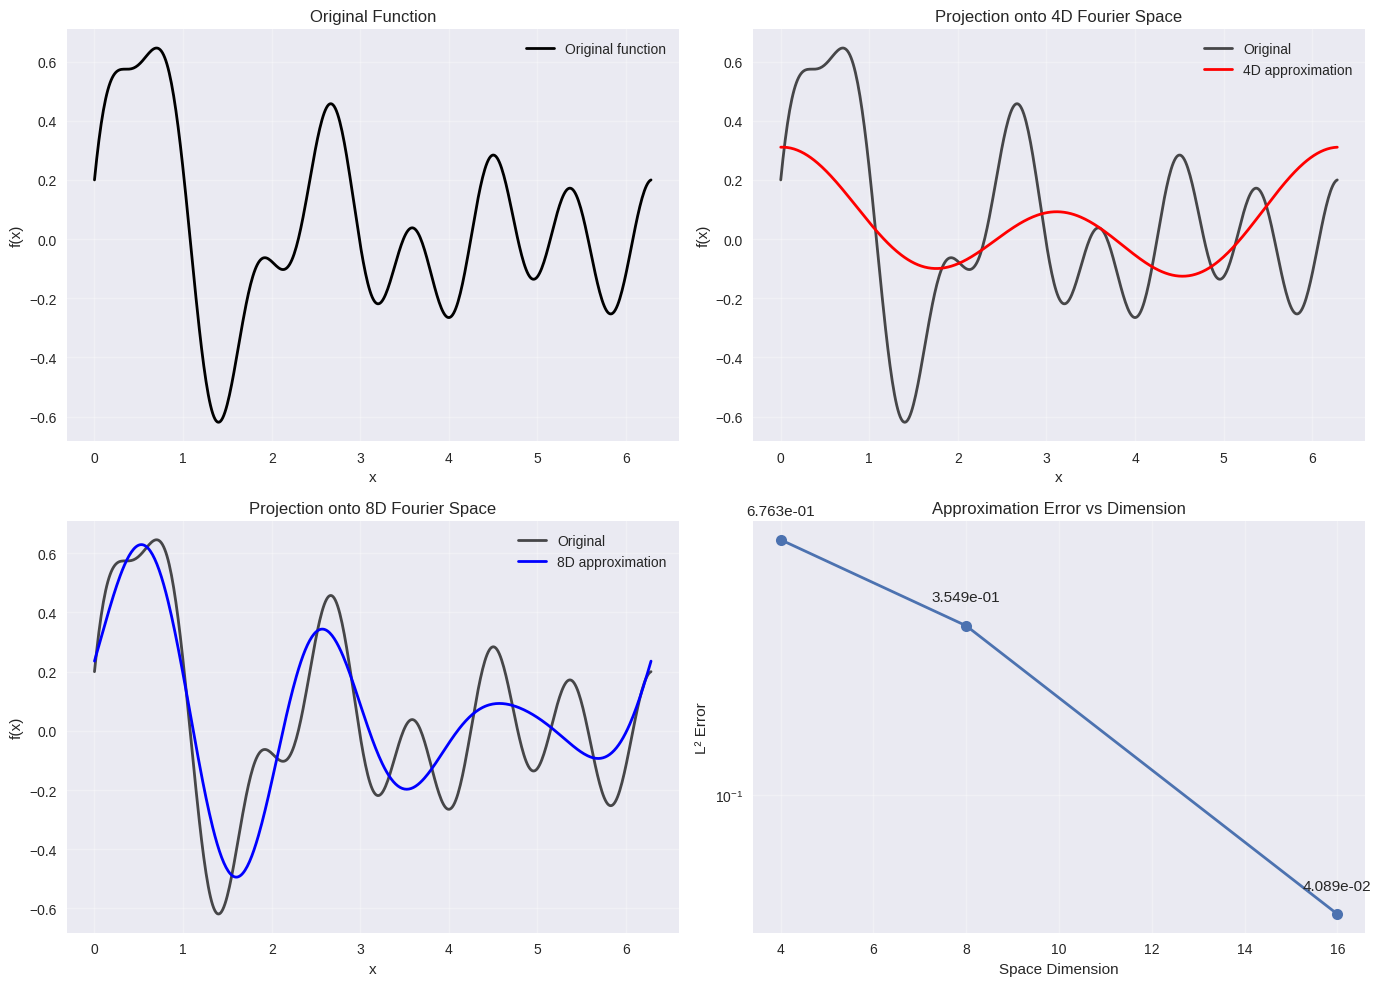


Projection results:
   4D space: L² error = 0.676296
   8D space: L² error = 0.354863
   16D space: L² error = 0.040885

✓ Higher-dimensional spaces provide better approximations!
✓ Function projection is a key feature of L² spaces!


In [6]:
print("=== Function Projection and Approximation ===")
print()

# Define a test function to approximate
def test_function(x):
    return np.sin(3*x) * np.exp(-0.5*x) + 0.2*np.cos(7*x)

# Create L²spaces with different dimensions
domain = IntervalDomain(0, 2*np.pi, boundary_conditions=BoundaryConditions.periodic())
dimensions = [4, 8, 16]
spaces = [L2Space(dim, function_domain=domain, basis_type='fourier') for dim in dimensions]

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x_fine = np.linspace(0, 2*np.pi, 500)
y_true = test_function(x_fine)

# Plot original function
ax = axes[0, 0]
ax.plot(x_fine, y_true, 'k-', linewidth=2, label='Original function')
ax.set_title('Original Function')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()

# Plot approximations for different dimensions
colors = ['red', 'blue', 'green']
errors = []

for i, (space, color) in enumerate(zip(spaces, colors)):
    print(f"Projecting onto {space.dim}-dimensional Fourier space...")

    # Project the function
    projected_func = space.project(test_function)

    # Evaluate the projection
    y_approx = np.array([projected_func.evaluate(xi) for xi in x_fine])

    # Compute L² error (approximately) - using trapezoid instead of deprecated trapz
    error = np.sqrt(np.trapezoid((y_true - y_approx)**2, x_fine))
    errors.append(error)

    print(f"   L² approximation error: {error:.6f}")

    # Plot the approximation
    if i < 2:
        ax = axes[0, 1] if i == 0 else axes[1, 0]
        ax.plot(x_fine, y_true, 'k-', linewidth=2, alpha=0.7, label='Original')
        ax.plot(x_fine, y_approx, color=color, linewidth=2,
               label=f'{space.dim}D approximation')
        ax.set_title(f'Projection onto {space.dim}D Fourier Space')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, alpha=0.3)
        ax.legend()

# Error convergence plot
ax = axes[1, 1]
ax.semilogy(dimensions, errors, 'o-', linewidth=2, markersize=8)
ax.set_title('Approximation Error vs Dimension')
ax.set_xlabel('Space Dimension')
ax.set_ylabel('L² Error')
ax.grid(True, alpha=0.3)

# Add error values as text
for dim, error in zip(dimensions, errors):
    ax.text(dim, error*1.2, f'{error:.3e}', ha='center')

plt.tight_layout()
plt.show()

print()
print("Projection results:")
for dim, error in zip(dimensions, errors):
    print(f"   {dim}D space: L² error = {error:.6f}")

print()
print("✓ Higher-dimensional spaces provide better approximations!")
print("✓ Function projection is a key feature of L² spaces!")

## 6. Coefficient Representation and Linear Algebra

Functions in finite-dimensional L²spaces can be represented as coefficient vectors.

=== Coefficient Representation and Linear Algebra ===

Working with 6D Fourier space on (0.0, 6.283185307179586)

Function projection and coefficient extraction:
   Coefficient vector: [1.89095114e-16 1.82820641e-17 1.77245385e+00 8.86226925e-01
 3.46544726e-16 9.83909538e-17]
   Coefficient shape: (6,)

Coefficient breakdown:
   φ_0 (constant): coefficient = 0.000000
   φ_1 (cos_1): coefficient = 0.000000
   φ_2 (sin_1): coefficient = 1.772454
   φ_3 (cos_2): coefficient = 0.886227
   φ_4 (sin_2): coefficient = 0.000000
   φ_5 (cos_3): coefficient = 0.000000

Reconstruction verification:
   Max reconstruction error: 4.44e-16
   Perfect reconstruction: True


/home/adrian/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:250: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


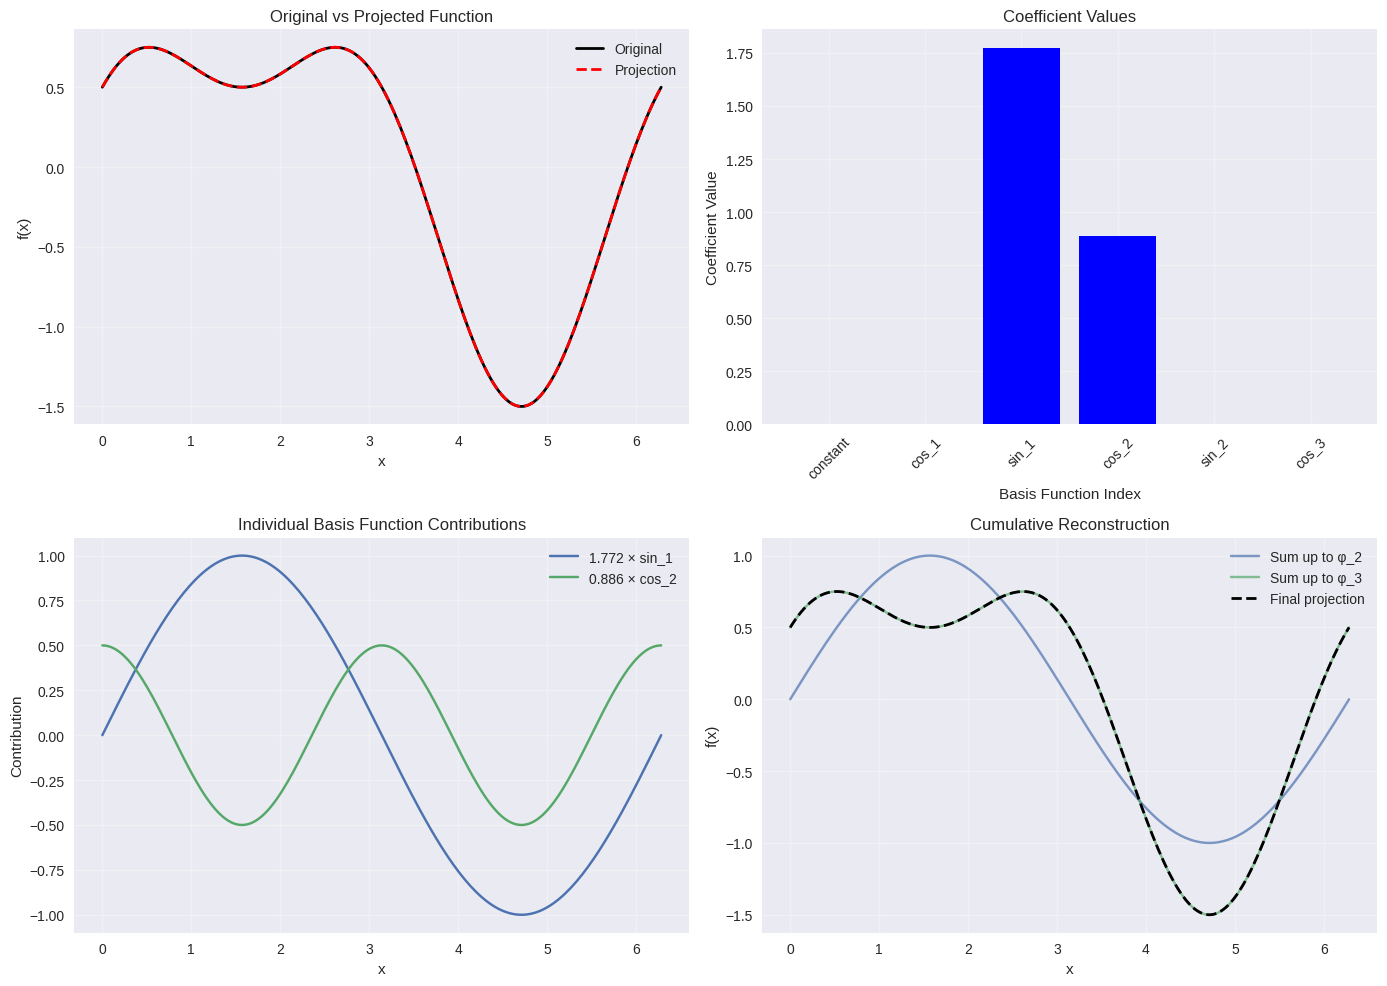


✓ Functions in L²spaces have dual representation:
  • As L2Function objects (evaluate at points)
  • As coefficient vectors (linear algebra)
✓ Perfect reconstruction guarantees mathematical consistency!


In [7]:
print("=== Coefficient Representation and Linear Algebra ===")
print()

# Create a small space for demonstration
domain = IntervalDomain(0, 2*np.pi, boundary_conditions=BoundaryConditions.periodic())
space = L2Space(6, function_domain=domain, basis_type='fourier')

# Define a simple function
def simple_func(x):
    return np.sin(x) + 0.5*np.cos(2*x)

print(f"Working with {space.dim}D Fourier space on {space.interval}")
print()

# Project the function and get coefficients
projected_func = space.project(simple_func)
coefficients = space._to_components(projected_func)

print("Function projection and coefficient extraction:")
print(f"   Coefficient vector: {coefficients}")
print(f"   Coefficient shape: {coefficients.shape}")
print()

# Show which basis functions correspond to which coefficients
print("Coefficient breakdown:")
for i, coeff in enumerate(coefficients):
    basis_func = space.get_basis_function(i)
    print(f"   φ_{i} ({basis_func.name}): coefficient = {coeff:.6f}")

print()

# Reconstruct function from coefficients
reconstructed_func = space._from_components(coefficients)

# Verify reconstruction
x_test = np.linspace(0, 2*np.pi, 100)
y_original = np.array([projected_func.evaluate(xi) for xi in x_test])
y_reconstructed = np.array([reconstructed_func.evaluate(xi) for xi in x_test])

reconstruction_error = np.max(np.abs(y_original - y_reconstructed))
print(f"Reconstruction verification:")
print(f"   Max reconstruction error: {reconstruction_error:.2e}")
print(f"   Perfect reconstruction: {reconstruction_error < 1e-12}")

# Visualize the decomposition
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original and projected function
ax = axes[0, 0]
x_plot = np.linspace(0, 2*np.pi, 200)
y_true = simple_func(x_plot)
y_proj = np.array([projected_func.evaluate(xi) for xi in x_plot])

ax.plot(x_plot, y_true, 'k-', linewidth=2, label='Original')
ax.plot(x_plot, y_proj, 'r--', linewidth=2, label='Projection')
ax.set_title('Original vs Projected Function')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()

# Coefficient bar plot
ax = axes[0, 1]
basis_names = [space.get_basis_function(i).name for i in range(space.dim)]
bars = ax.bar(range(space.dim), coefficients, color=['red' if c < 0 else 'blue' for c in coefficients])
ax.set_title('Coefficient Values')
ax.set_xlabel('Basis Function Index')
ax.set_ylabel('Coefficient Value')
ax.set_xticks(range(space.dim))
ax.set_xticklabels(basis_names, rotation=45)
ax.grid(True, alpha=0.3)

# Individual basis function contributions
ax = axes[1, 0]
for i in range(min(4, space.dim)):
    if abs(coefficients[i]) > 1e-6:  # Only plot significant contributions
        basis_func = space.get_basis_function(i)
        y_basis = np.array([coefficients[i] * basis_func.evaluate(xi) for xi in x_plot])
        ax.plot(x_plot, y_basis, label=f'{coefficients[i]:.3f} × {basis_func.name}')

ax.set_title('Individual Basis Function Contributions')
ax.set_xlabel('x')
ax.set_ylabel('Contribution')
ax.grid(True, alpha=0.3)
ax.legend()

# Cumulative reconstruction
ax = axes[1, 1]
y_cumulative = np.zeros_like(x_plot)
significant_indices = [i for i in range(space.dim) if abs(coefficients[i]) > 1e-6]

for idx, i in enumerate(significant_indices):
    basis_func = space.get_basis_function(i)
    y_contribution = np.array([coefficients[i] * basis_func.evaluate(xi) for xi in x_plot])
    y_cumulative += y_contribution
    ax.plot(x_plot, y_cumulative, label=f'Sum up to φ_{i}', alpha=0.7)

ax.plot(x_plot, y_proj, 'k--', linewidth=2, label='Final projection')
ax.set_title('Cumulative Reconstruction')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

print()
print("✓ Functions in L²spaces have dual representation:")
print("  • As L2Function objects (evaluate at points)")
print("  • As coefficient vectors (linear algebra)")
print("✓ Perfect reconstruction guarantees mathematical consistency!")

## 7. Lazy Basis Function Evaluation

L²Space uses lazy evaluation to create basis functions on-demand, improving memory efficiency for high-dimensional spaces.

In [8]:
print("=== Lazy Basis Function Evaluation ===")
print()

# Create a large-dimensional space
domain = IntervalDomain(0, 2*np.pi, boundary_conditions=BoundaryConditions.periodic())
large_space = L2Space(100, function_domain=domain, basis_type='fourier')

print(f"Created large L²Space with dimension {large_space.dim}")
print()

# Show that basis functions are created lazily
print("Lazy evaluation demonstration:")
print(f"   Space dimension: {large_space.dim}")
print(f"   Basis provider type: {type(large_space.basis_functions)}")
print(f"   Cache initially empty: {len(large_space.basis_functions._cache) == 0}")
print()

# Access some basis functions
print("Accessing individual basis functions:")
for i in [0, 10, 50, 99]:
    basis_func = large_space.get_basis_function(i)
    print(f"   Accessed φ_{i}: {basis_func.name}")

print(f"   Cache now contains: {len(large_space.basis_functions._cache)} functions")
print(f"   Cache keys: {list(large_space.basis_functions._cache.keys())}")
print()

# Demonstrate indexing and iteration interfaces
print("Interface demonstration:")
print(f"   Direct indexing: basis_functions[5] = {large_space.basis_functions[5].name}")
print(f"   Length: len(basis_functions) = {len(large_space.basis_functions)}")

print("   Iteration over first 5 basis functions:")
for i, basis_func in enumerate(large_space.basis_functions):
    if i >= 5:
        break
    print(f"     φ_{i}: {basis_func.name}")

print(f"   Cache after iteration: {len(large_space.basis_functions._cache)} functions")
print()

=== Lazy Basis Function Evaluation ===

Created large L²Space with dimension 100

Lazy evaluation demonstration:
   Space dimension: 100
   Basis provider type: <class 'pygeoinf.interval.l2_space.LazyBasisProvider'>
   Cache initially empty: True

Accessing individual basis functions:
   Accessed φ_0: constant
   Accessed φ_10: sin_5
   Accessed φ_50: sin_25
   Accessed φ_99: cos_50
   Cache now contains: 4 functions
   Cache keys: [0, 10, 50, 99]

Interface demonstration:
   Direct indexing: basis_functions[5] = cos_3
   Length: len(basis_functions) = 100
   Iteration over first 5 basis functions:
     φ_0: constant
     φ_1: cos_1
     φ_2: sin_1
     φ_3: cos_2
     φ_4: sin_2
   Cache after iteration: 9 functions



## 8. Domain Integration and Consistency

The unified IntervalDomain interface ensures mathematical consistency between domain properties and function space behavior.

=== Domain Integration and Mathematical Consistency ===

Domain-Function Space Integration:
   Domain: [-2.0, 3.0]
   Domain name: Custom Domain
   Domain length: 5.0
   Domain center: 0.5
   Interval from domain: (-2.0, 3.0)
   Boundary conditions: periodic

Function evaluation consistency:
   x=-2.0: in domain=True, f(x)= 0.0000
   x= 0.5: in domain=True, f(x)= 0.0000
   x= 3.0: in domain=True, f(x)=-0.0000

Integration consistency between domain and function space:
   Direct domain integration: -0.000000
   Function space integration: -0.000000
   Difference: 5.19e-11

Domain operations and function space consistency:
   Original domain: [-2.0, 3.0]
   Subdomain: [-1.0, 2.0]
   Original space: dim=8, BCs=periodic
   Subspace: dim=6, BCs=periodic

Dynamic boundary condition modification:
   Initial domain: [0.0, 1.0] with BCs: None
   After modification: BCs = periodic
   Original domain BCs: periodic
   New domain BCs: dirichlet



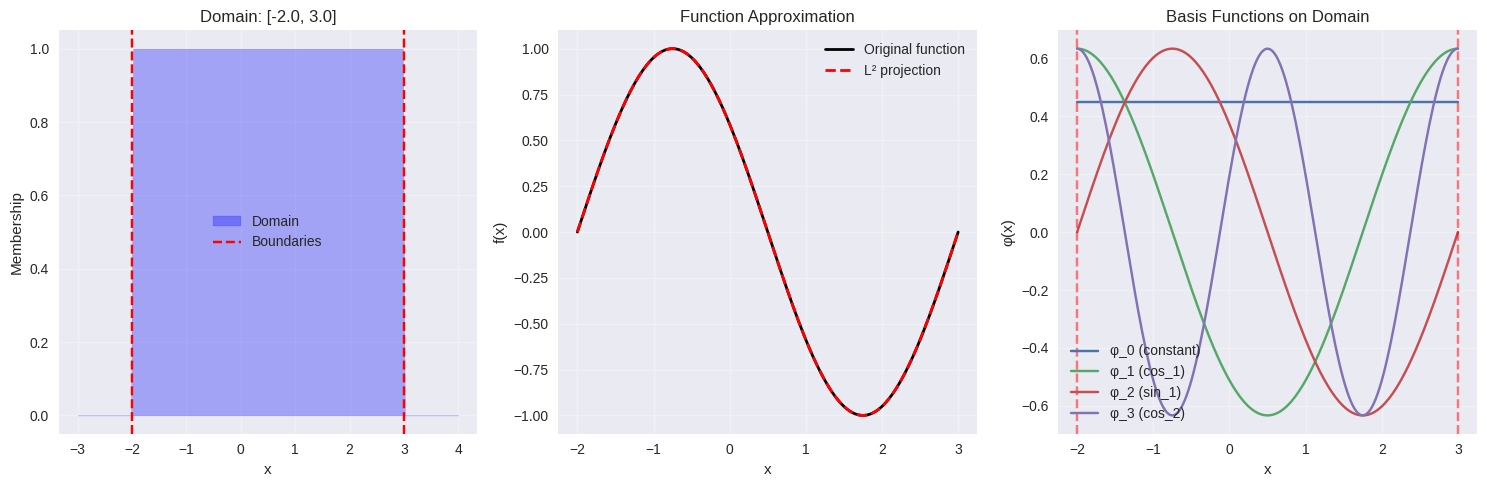

In [9]:
print("=== Domain Integration and Mathematical Consistency ===")
print()

# Create a domain with specific properties
domain = IntervalDomain(-2, 3, boundary_conditions=BoundaryConditions.periodic(), name="Custom Domain")
space = L2Space(8, function_domain=domain, basis_type='fourier')

print("Domain-Function Space Integration:")
print(f"   Domain: {space.function_domain}")
print(f"   Domain name: {space.function_domain.name}")
print(f"   Domain length: {space.function_domain.length}")
print(f"   Domain center: {space.function_domain.center}")
print(f"   Interval from domain: {space.interval}")
print(f"   Boundary conditions: {space.boundary_conditions}")
print()

# Test function evaluation using domain properties
def test_function(x):
    return np.sin(2*np.pi*(x - domain.a)/domain.length)

print("Function evaluation consistency:")
test_points = [domain.a, domain.center, domain.b]
for x in test_points:
    domain_contains = domain.contains(x)
    func_value = test_function(x)
    print(f"   x={x:4.1f}: in domain={domain_contains}, f(x)={func_value:7.4f}")

print()

# Integration consistency
print("Integration consistency between domain and function space:")

# Direct domain integration
domain_integral = domain.integrate(test_function)
print(f"   Direct domain integration: {domain_integral:.6f}")

# Function space projection and integration
projected_func = space.project(test_function)
space_integral = projected_func.integrate()
print(f"   Function space integration: {space_integral:.6f}")
print(f"   Difference: {abs(domain_integral - space_integral):.2e}")

print()

# Domain operations preserve function space properties
print("Domain operations and function space consistency:")

# Create subdomain
subdomain = domain.restriction_to_subinterval(-1, 2)
subspace = L2Space(6, function_domain=subdomain, basis_type='fourier')

print(f"   Original domain: {domain}")
print(f"   Subdomain: {subdomain}")
print(f"   Original space: dim={space.dim}, BCs={space.boundary_conditions.type}")
print(f"   Subspace: dim={subspace.dim}, BCs={subspace.boundary_conditions.type}")

print()

# Demonstrate boundary condition modification
print("Dynamic boundary condition modification:")
modifiable_domain = IntervalDomain(0, 1)
print(f"   Initial domain: {modifiable_domain} with BCs: {modifiable_domain.boundary_conditions}")

# Set boundary conditions
modifiable_domain.set_boundary_conditions(BoundaryConditions.periodic())
modified_space = L2Space(6, function_domain=modifiable_domain, basis_type='fourier')
print(f"   After modification: BCs = {modified_space.boundary_conditions.type}")

# Create new domain with different BCs (immutable operation)
new_domain = modifiable_domain.with_boundary_conditions(BoundaryConditions.dirichlet(0, 1))
print(f"   Original domain BCs: {modifiable_domain.boundary_conditions.type}")
print(f"   New domain BCs: {new_domain.boundary_conditions.type}")

print()

# Visualize domain-function space relationship
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Domain visualization
ax = axes[0]
x_domain = np.linspace(domain.a - 1, domain.b + 1, 200)
in_domain = domain.contains(x_domain)
ax.fill_between(x_domain, 0, in_domain, alpha=0.3, color='blue', label='Domain')
ax.axvline(domain.a, color='red', linestyle='--', label='Boundaries')
ax.axvline(domain.b, color='red', linestyle='--')
ax.set_title(f'Domain: {domain}')
ax.set_xlabel('x')
ax.set_ylabel('Membership')
ax.legend()
ax.grid(True, alpha=0.3)

# Function and its projection
ax = axes[1]
x_func = np.linspace(domain.a, domain.b, 200)
y_true = test_function(x_func)
y_proj = np.array([projected_func.evaluate(xi) for xi in x_func])

ax.plot(x_func, y_true, 'k-', linewidth=2, label='Original function')
ax.plot(x_func, y_proj, 'r--', linewidth=2, label='L² projection')
ax.set_title('Function Approximation')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True, alpha=0.3)

# Basis functions respect domain
ax = axes[2]
for i in range(min(4, space.dim)):
    basis_func = space.get_basis_function(i)
    y_basis = np.array([basis_func.evaluate(xi) for xi in x_func])
    ax.plot(x_func, y_basis, label=f'φ_{i} ({basis_func.name})')

ax.axvline(domain.a, color='red', linestyle='--', alpha=0.5)
ax.axvline(domain.b, color='red', linestyle='--', alpha=0.5)
ax.set_title('Basis Functions on Domain')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()